In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# pip install tensorflow

## Module 1 - Data Acquisition & Preprocessing

In [3]:
data=pd.read_csv('./Dataset/heart.csv') #Cleveland Heart Disease Dataset
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Checking if the dataset contains NULL values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### No null values - No need of filling missing values

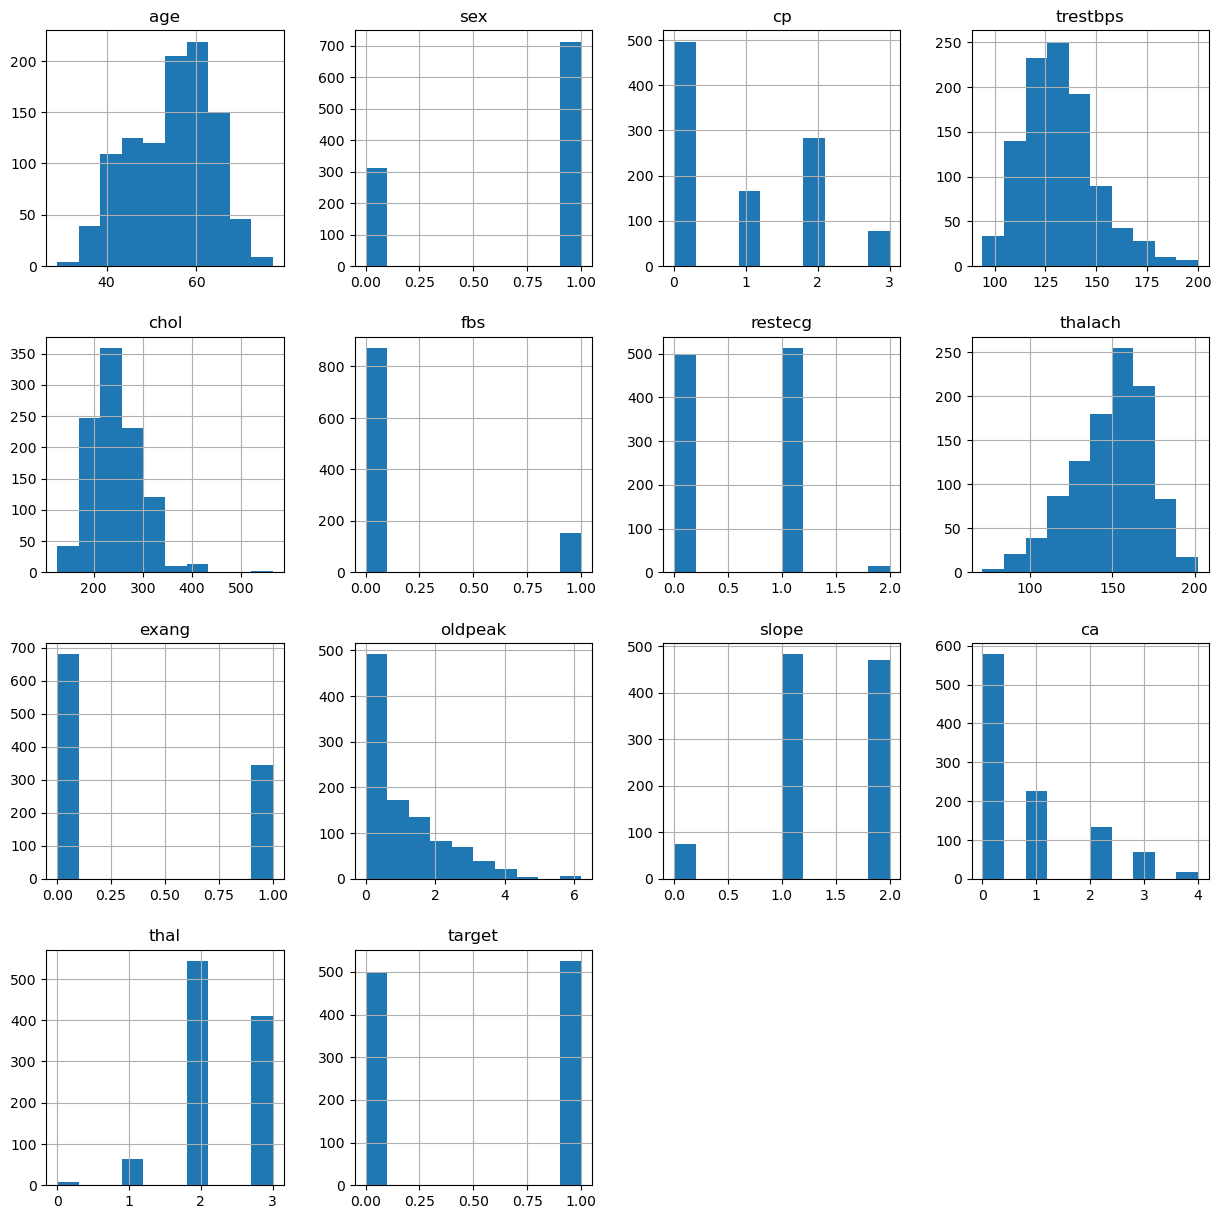

In [6]:
data.hist(bins=10,figsize=(15,15))
plt.show()

<Axes: >

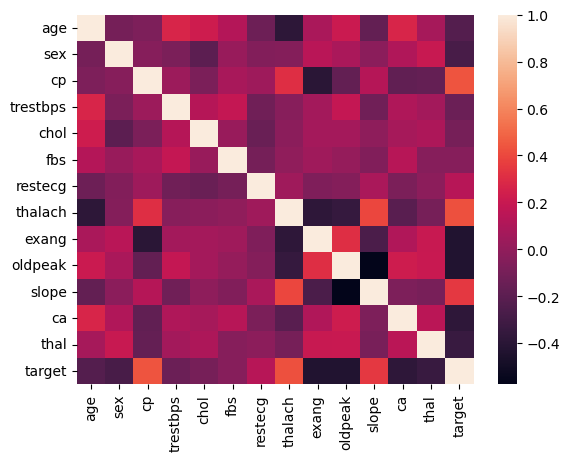

In [7]:
sns.heatmap(data.corr())

<Axes: xlabel='count', ylabel='target'>

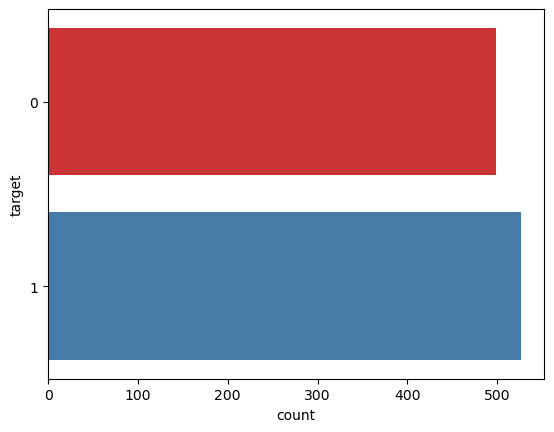

In [8]:
sns.countplot(y=data['target'],palette='Set1')

<Axes: >

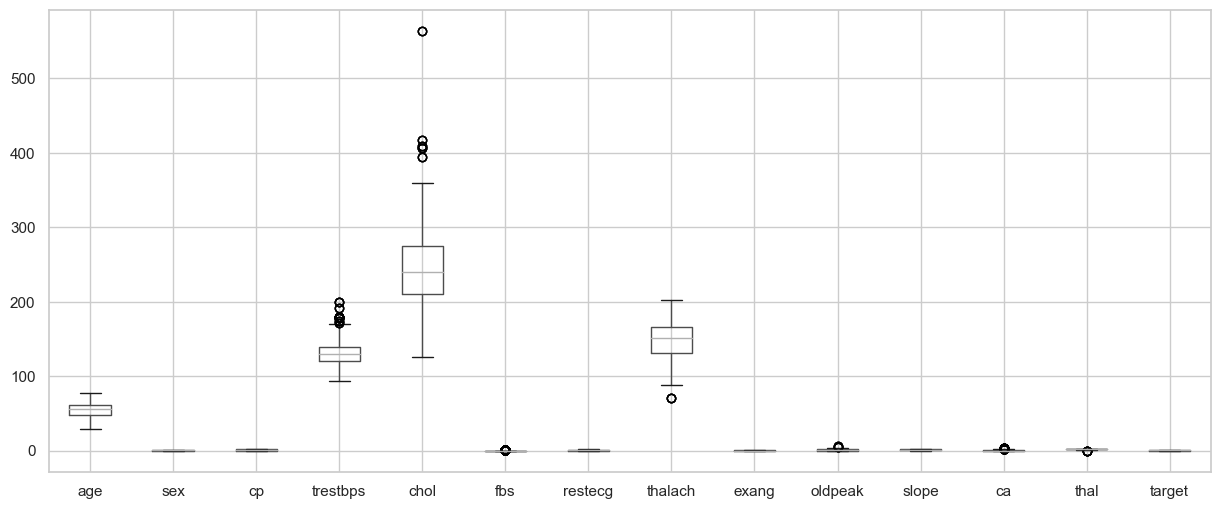

In [9]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

## Outliers Removal - IQR technique

In [10]:
#Outliers removal

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---dQ1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR--- \n",IQR)

---dQ1--- 
 age          48.0
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     132.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

---Q3--- 
 age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        275.0
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.8
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64

---IQR--- 
 age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [11]:
#diabetes_dataset

data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

((1025, 14), (769, 14))

## Module 2 - Data Preprocessing

### Feature Engineering

In [12]:
X=data_out.drop(columns=['target'])
y=data_out['target']

def age_group(row):
    if row['age'] < 30:
        return '0'
    elif row['age'] > 30 and row['age'] > 62:
        return '1'
    else:
        return '2'

data['age_group'] = data.apply(age_group,axis=1)

#### Data after feature engineering

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3


### Data Splitting

In [14]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((538, 13), (231, 13), (538,), (231,))

### Data Normalisation

In [15]:
norm=MinMaxScaler().fit(train_X)
train_X_norm=norm.transform(train_X)
test_X_norm=norm.transform(test_X)

# Module 3 - SVM Model

In [17]:
from tensorflow import keras
from tensorflow.keras.models import save_model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM model
model = SVC(kernel='linear', C=1.0, gamma='auto')

# Train the model
model.fit(train_X_norm, train_y)

# Make predictions on the testing set
y_pred1 = model.predict(test_X_norm)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy*100))


keras_model = Sequential()
keras_model.add(Dense(1, input_dim=13, activation='sigmoid', use_bias=False))
keras_model.layers[0].set_weights([model.coef_.T])
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# evaluate Keras model on testing set
keras_model.fit(train_X_norm, train_y, batch_size=10, epochs=500)
score = keras_model.evaluate(test_X_norm, test_y, verbose=0)
print('Test accuracy:', score[1])
keras_model.save('svm.h5')

Accuracy: 87.45%
Epoch 1/500
54/54 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.6673
Epoch 2/500
54/54 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.6933
Epoch 3/500
54/54 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7175
Epoch 4/500
54/54 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7379
Epoch 5/500
54/54 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7844
Epoch 6/500
54/54 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.7955
Epoch 7/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8086
Epoch 8/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8476
Epoch 9/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8532
Epoch 10/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy:

54/54 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8959
Epoch 83/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8959
Epoch 84/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8959
Epoch 85/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8959
Epoch 86/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8959
Epoch 87/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8959
Epoch 88/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8959
Epoch 89/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8959
Epoch 90/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8959
Epoch 91/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8959
Epoch 92/500


54/54 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8922
Epoch 164/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8922
Epoch 165/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8922
Epoch 166/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8922
Epoch 167/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8922
Epoch 168/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8922
Epoch 169/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8922
Epoch 170/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8922
Epoch 171/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8922
Epoch 172/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8922
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8941
Epoch 245/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8941
Epoch 246/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8922
Epoch 247/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8922
Epoch 248/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8922
Epoch 249/500
54/54 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8941
Epoch 250/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8922
Epoch 251/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8941
Epoch 252/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8922
Epoch 253/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8941
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8996
Epoch 326/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8996
Epoch 327/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8996
Epoch 328/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8996
Epoch 329/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8996
Epoch 330/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8996
Epoch 331/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8996
Epoch 332/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8996
Epoch 333/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8996
Epoch 334/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8996
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8996
Epoch 407/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8996
Epoch 408/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.9015
Epoch 409/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8996
Epoch 410/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8996
Epoch 411/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8996
Epoch 412/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.9015
Epoch 413/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.9015
Epoch 414/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.9015
Epoch 415/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8996
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.9015
Epoch 488/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.9071
Epoch 489/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.9015
Epoch 490/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9071
Epoch 491/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9033
Epoch 492/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9052
Epoch 493/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8941
Epoch 494/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9015
Epoch 495/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8996
Epoch 496/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9033
Epoc

### Confusion Matrix - SVM

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)
cm

array([[ 84,  16],
       [ 13, 118]], dtype=int64)

Text(79.75, 0.5, 'Truth')

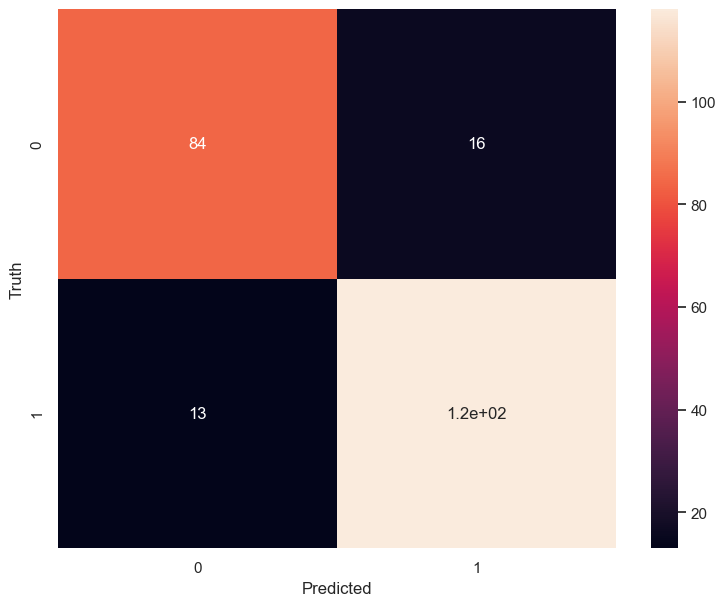

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(9,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Performance Evaluation (Validation) - SVM

In [20]:

tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.0992
Sensitivity: 0.9008
Specificity: 0.8400
Positive predictive value: 0.8806
Negative predictive value: 0.8660
False positive rate: 0.1600
False negative rate: 0.0992
F1 score: 0.8906


# Module 4 - ANN Model

In [21]:

classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=train_X_norm.shape[1]))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN
classifier.fit(train_X_norm, train_y, batch_size=10, epochs=500)

# Predict test set results
y_pred2 = classifier.predict(test_X_norm)
for i in range(len(y_pred2)):
    if(y_pred2[i] > 0.4):
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/500
54/54 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5409
Epoch 2/500
54/54 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5409
Epoch 3/500
54/54 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5743
Epoch 4/500
54/54 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.7119
Epoch 5/500
54/54 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.7844
Epoch 6/500
54/54 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7993
Epoch 7/500
54/54 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.8327
Epoch 8/500
54/54 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8327
Epoch 9/500
54/54 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8383
Epoch 10/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8494
Epoch 11/

54/54 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8848
Epoch 84/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8829
Epoch 85/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8829
Epoch 86/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8792
Epoch 87/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8903
Epoch 88/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8810
Epoch 89/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8773
Epoch 90/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8829
Epoch 91/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8829
Epoch 92/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8829
Epoch 93/500


54/54 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8773
Epoch 165/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8755
Epoch 166/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8773
Epoch 167/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8699
Epoch 168/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8829
Epoch 169/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8755
Epoch 170/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8810
Epoch 171/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8792
Epoch 172/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8755
Epoch 173/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8717
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8810
Epoch 246/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8717
Epoch 247/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8773
Epoch 248/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8717
Epoch 249/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8755
Epoch 250/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8662
Epoch 251/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8773
Epoch 252/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8773
Epoch 253/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8736
Epoch 254/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8680
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8717
Epoch 327/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8755
Epoch 328/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8717
Epoch 329/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8699
Epoch 330/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8606
Epoch 331/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8736
Epoch 332/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8810
Epoch 333/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8755
Epoch 334/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8773
Epoch 335/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8717
Epoc

54/54 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8736
Epoch 408/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8717
Epoch 409/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8829
Epoch 410/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8662
Epoch 411/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8736
Epoch 412/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8680
Epoch 413/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8736
Epoch 414/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8662
Epoch 415/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8717
Epoch 416/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8717
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8736
Epoch 489/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8717
Epoch 490/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8699
Epoch 491/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8699
Epoch 492/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8680
Epoch 493/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8755
Epoch 494/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8736
Epoch 495/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8736
Epoch 496/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8680
Epoch 497/500
54/54 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8736
Epoc

### Confusion Matrix - ANN

In [22]:
classifier.save('ann.h5')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred2)
cm

array([[ 80,  20],
       [  6, 125]], dtype=int64)

Text(92.25, 0.5, 'Truth')

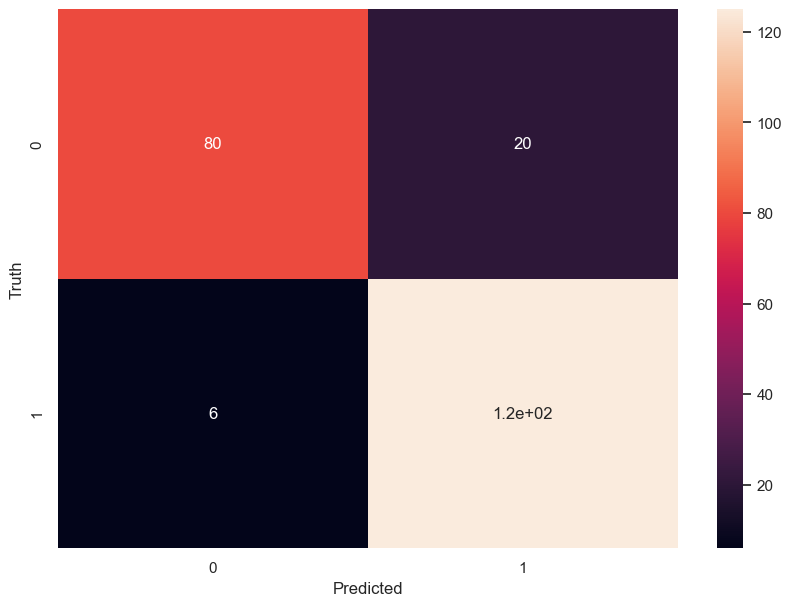

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
counter = 20
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Performance Evaluation (Validation) - ANN

In [24]:
tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.0458
Sensitivity: 0.9542
Specificity: 0.8000
Positive predictive value: 0.8621
Negative predictive value: 0.9302
False positive rate: 0.2000
False negative rate: 0.0458
F1 score: 0.9058


## FUZZY LOGIC

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tensorflow.keras.models import load_model

In [26]:
ann_model=load_model('ann.h5')
svm_model=load_model('svm.h5')

# Create input variables for SVM and ANN models
svm_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'svm_input')
ann_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'ann_input')

# Create output variable for the fused model
heart_disease_prediction = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'diabetes_prediction')

# svm_output.automf(3)
# ann_output.automf(3)

svm_input[low]


C:\Users\Asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


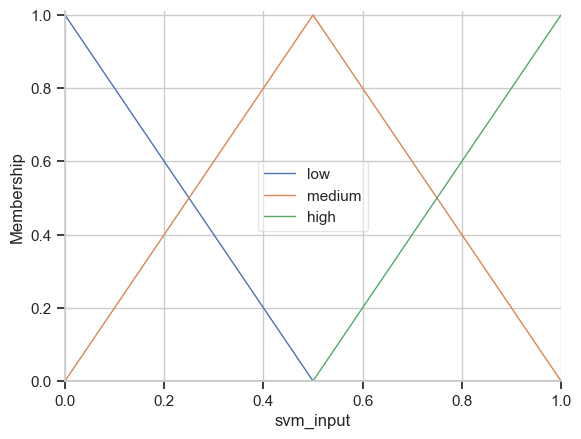

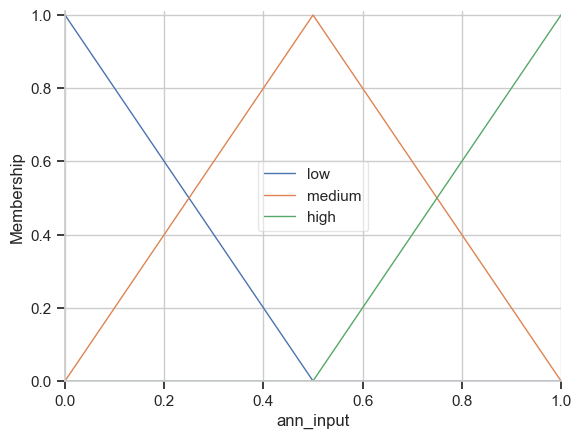

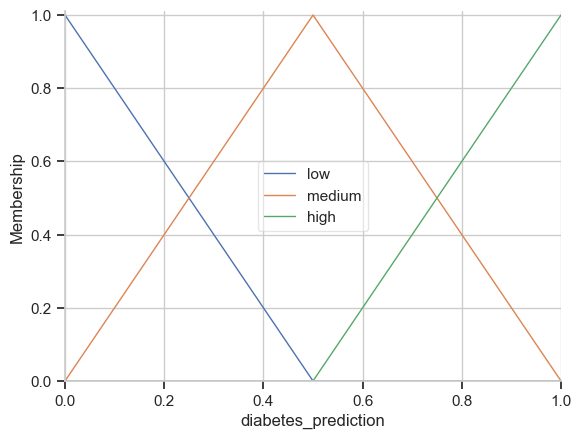

In [27]:
# Create fuzzy sets for input and output variables
svm_output['low'] = fuzz.trimf(svm_output.universe, [0, 0, 0.5])
svm_output['medium'] = fuzz.trimf(svm_output.universe, [0, 0.5, 1])
svm_output['high'] = fuzz.trimf(svm_output.universe, [0.5, 1, 1])

ann_output['low'] = fuzz.trimf(ann_output.universe, [0, 0, 0.5])
ann_output['medium'] = fuzz.trimf(ann_output.universe, [0, 0.5, 1])
ann_output['high'] = fuzz.trimf(ann_output.universe, [0.5, 1, 1])

heart_disease_prediction['low'] = fuzz.trimf(heart_disease_prediction.universe, [0, 0, 0.5])
heart_disease_prediction['medium'] = fuzz.trimf(heart_disease_prediction.universe, [0, 0.5, 1])
heart_disease_prediction['high'] = fuzz.trimf(heart_disease_prediction.universe, [0.5, 1, 1])
print(svm_output['low'])
svm_output.view()
ann_output.view()
heart_disease_prediction.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

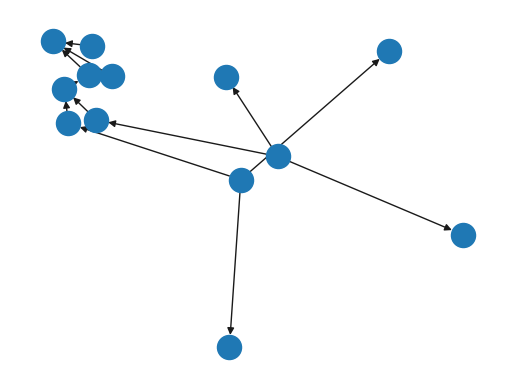

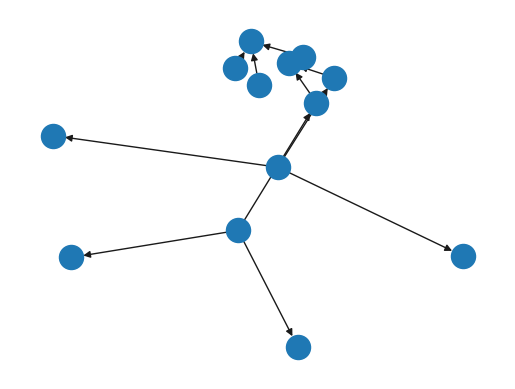

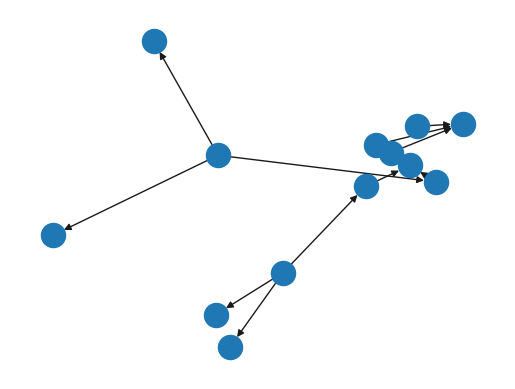

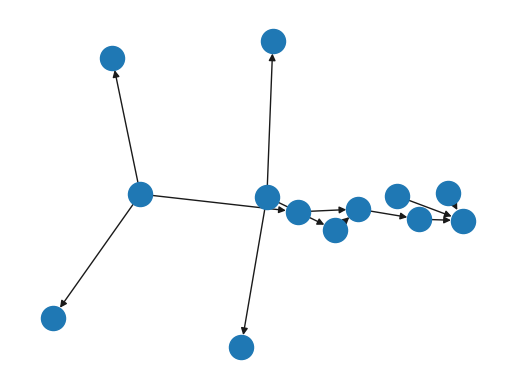

In [28]:
# Define fuzzy rules for the fused model
rule1 = ctrl.Rule(svm_output['low'] & ann_output['low'], heart_disease_prediction['low'])
rule2 = ctrl.Rule(svm_output['low'] & ann_output['medium'], heart_disease_prediction['medium'])
rule3 = ctrl.Rule(svm_output['low'] & ann_output['high'], heart_disease_prediction['high'])
rule4 = ctrl.Rule(svm_output['medium'] & ann_output['low'], heart_disease_prediction['medium'])
rule5 = ctrl.Rule(svm_output['medium'] & ann_output['medium'], heart_disease_prediction['medium'])
rule6 = ctrl.Rule(svm_output['medium'] & ann_output['high'], heart_disease_prediction['high'])
rule7 = ctrl.Rule(svm_output['high'] & ann_output['low'], heart_disease_prediction['high'])
rule8 = ctrl.Rule(svm_output['high'] & ann_output['medium'], heart_disease_prediction['high'])
rule9 = ctrl.Rule(svm_output['high'] & ann_output['high'], heart_disease_prediction['high'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()

In [29]:
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

simulation = ctrl.ControlSystemSimulation(fuzzy_system)

svm_output_val = svm_model.predict(test_X_norm)  # replace X_test with your test data for SVM
ann_output_val = ann_model.predict(test_X_norm)  # replace X_test with your test data for ANN

simulation.input['svm_input'] = svm_output_val
simulation.input['ann_input'] = ann_output_val

simulation.compute()

fused_prediction = simulation.output['diabetes_prediction']

8/8 [==============================] - 0s 2ms/step


In [30]:
for i in range(len(fused_prediction)):
    if fused_prediction[i]>0.5:
        fused_prediction[i]=1
    else:
        fused_prediction[i]=0
for i in range(len(test_y)):
    if fused_prediction[i] == test_y.iloc[i]:
        counter += 1
print("Accuracy: ", counter/len(test_y)*100)

Accuracy:  96.96969696969697


In [31]:
from sklearn.metrics import classification_report

print(classification_report(fused_prediction, test_y))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        95
         1.0       0.92      0.88      0.90       136

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231



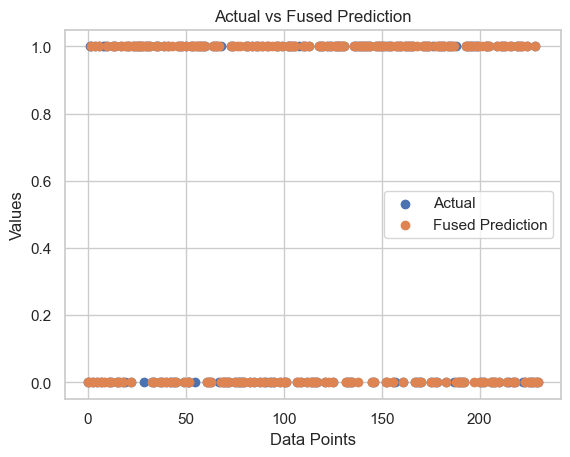

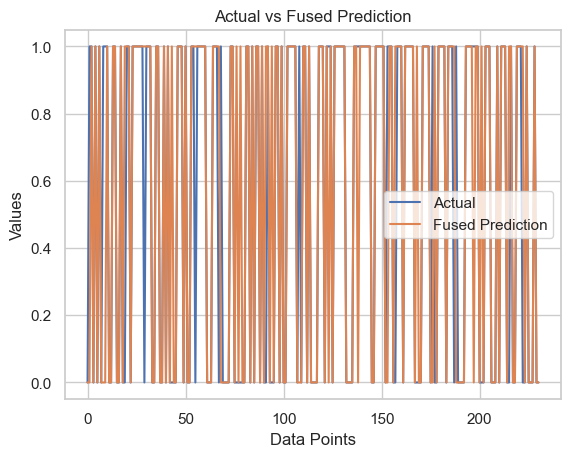

In [32]:
import matplotlib.pyplot as plt

# Plotting a scatter plot
plt.scatter(range(len(test_y)), test_y, label='Actual')
plt.scatter(range(len(fused_prediction)), fused_prediction, label='Fused Prediction')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Fused Prediction')
plt.legend()
plt.show()

# Plotting a line plot
plt.plot(range(len(test_y)), test_y, label='Actual')
plt.plot(range(len(fused_prediction)), fused_prediction, label='Fused Prediction')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Fused Prediction')
plt.legend()
plt.show()

In [33]:
# # Scatter plot
# plt.figure(figsize=(8, 5))
# plt.scatter(range(len(test_y)), test_y, label='Actual')
# plt.scatter(range(len(fused_prediction)), fused_prediction, label='Fused Prediction')
# plt.xlabel('Test Cases')
# plt.ylabel('Output')
# plt.title('Actual vs Fused Prediction')
# plt.legend()
# plt.show()
